<a href="https://colab.research.google.com/github/emys-alb/ImersaoDados/blob/main/ImersaoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos dados do Enem 2019

In [4]:
import pandas as pd

In [29]:
import matplotlib.pyplot as plt

##Aula 01

In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

dados = pd.read_csv(url) 
dados.head(3) #Chama-se dataframe

In [ ]:
dados.shape

In [ ]:
dados["SG_UF_RESIDENCIA"] #serie do pandas

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [ ]:
dados.columns.values
dados[["SG_UF_RESIDENCIA", "Q025"]]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


### Dados sobre os Estados

In [ ]:
dados["SG_UF_RESIDENCIA"].unique() #Mostra cada Estado (sem repetição)
len(dados["SG_UF_RESIDENCIA"].unique()) #Quantos estados temos
dados["SG_UF_RESIDENCIA"].value_counts() #Conta quantas vezes cada estado aparece

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64


### Dados sobre idade dos participantes

In [ ]:
dados["NU_IDADE"].value_counts() #Quantidade de pessoas por idade
dados["NU_IDADE"].value_counts().sort_index() #Ordernando pelo indice
#MDS COMO ASSIM GENTE DE 13 ANOS FAZENDO ENEM????????

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
dados["NU_IDADE"].hist(figsize= (6,4))
plt.title("Historiograma dos inscritos por idade")

Cria um histograma porém da uma falsa impressão dos dados, sabemos que só tem 4 pessoas de 13 anos inscritas mas parece ter bem mais. Para uma analise mais detalhada aumentamos o número de bins (o nivél de detalhes do gráfico).

Text(0.5, 1.0, 'Historiograma dos inscritos por idade com range maior')

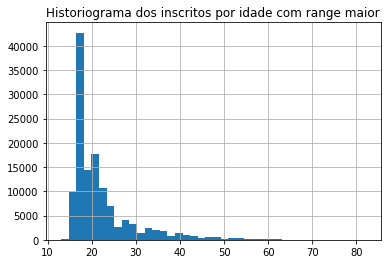

In [48]:
grafico = dados["NU_IDADE"].hist(bins = 40)
plt.title("Historiograma dos inscritos por idade com range maior")

### Desafios 001 e 002

**Fazer a proporção de inscrito por idade**

In [ ]:
dados["NU_IDADE"].value_counts(normalize=True).sort_values(ascending=False).head()

**Descobrir de quais estados são os inscritos de 13 anos.**

Para fazer esse, eu ordenei os elementos pelo index em um código muito similar ao utilizado anteriormente, e  inclui a coluna SG_UF nessa série. Mostrava a UF de todos os participantes por idade, então usei o head para mostrar apenas os 4 primeiros (aka os de 13 anos).



In [ ]:
dados[["NU_IDADE", "SG_UF_RESIDENCIA"]].value_counts().sort_index().head(4)

NU_IDADE  SG_UF_RESIDENCIA
13        AP                  1
          BA                  1
          MT                  1
          SP                  1
dtype: int64

Usando query:

In [7]:
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

### Dados sobre treineiros

In [ ]:
dados.query("IN_TREINEIRO == 1")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
12,190001005076,2019,1506138,Redenção,15,PA,15,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AADCCEDCCDBEABAECBABCEEACDEBDBBDBACBBEEDCADCB,AECBA99999ACDBECAACEAADBEAAAECDAECDEBAAEBCECEA...,DAADCAABECBBCBDADDEEEBCCAABADBBBECAACBDBDDCBC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,180.0,120.0,140.0,160.0,720.0,C,E,D,D,4,F,A,C,C,B,B,B,B,A,A,B,A,A,B,B,A,C,A,A,B
14,190001005081,2019,1506807,Santarém,15,PA,17,F,1,3,2,NaN,NaN,NaN,NaN,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,AABCDEBCEBCADAAAAEEEBCEEBDECDBACBEDEAABAACDBA,99999ADABAADAEABBAACDAABCDE*DABBABDAAEDAAAACBE...,AAAEDBCCEACBDDCBEAEBBCAAAABCCBABDCAAECCABCBDE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,80.0,60.0,120.0,20.0,400.0,D,E,F,F,4,B,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,A,A,B
16,190001005202,2019,1502301,Capitão Poço,15,PA,17,F,1,3,2,NaN,NaN,NaN,NaN,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EEEAABAADADCBCEDBCCACEEDBCBCBADBBAABDBBABCEAB,99999ECABECCBABCDAEADABEBEEBEEEEEDBDDBAACDAEAA...,ACBEDECCABCEDDEDCEDAACBCAADEEDCDEECBABEBAEC*B,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,120.0,120.0,100.0,580.0,D,E,B,B,3,B,A,B,C,A,A,B,B,A,A,B,A,A,B,B,A,C,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Query só é válido para data frames

### Desafio 003

**Plotar as idades de treineiros e não treineiros**

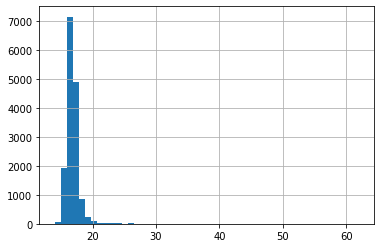

In [ ]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(bins=50)
plt.title("Gráfico com idade dos treineiros")

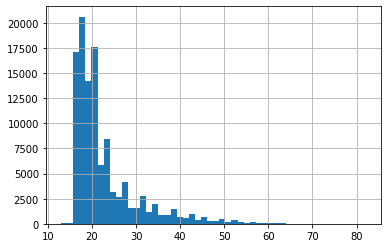

In [ ]:
dados.query("IN_TREINEIRO != 1")["NU_IDADE"].hist(bins=50)
plt.title("Gráfico com idade dos não-treineiros")

### Análise das notas

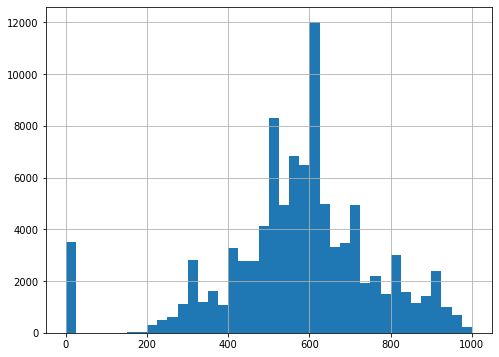

In [ ]:
dados["NU_NOTA_REDACAO"].hist(bins = 40, figsize =(8,6))
plt.title("Análise das notas de redação do ENEM 2019")

In [ ]:
dados['NU_NOTA_REDACAO'].mean() #Calcula média

In [ ]:
dados['NU_NOTA_REDACAO'].std() #Calcula o desvio padrão

In [ ]:
dados["NU_NOTA_LC"].hist(bins = 40, figsize =(8,6))
plt.title("Análise das notas de Limguagens e Códigos do ENEM 2019")

In [9]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


E esse 25%?50%?75%? são quantis. Às vezes queremos parcelas maiores ou menores que a mediana(50%).

In [ ]:
dados['NU_NOTA_LC'].quantile(0.9) #10% mais altos

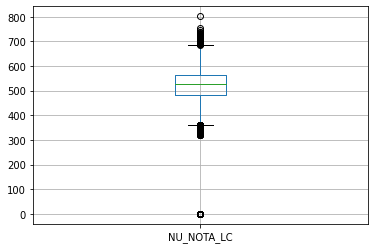

In [11]:
dados['NU_NOTA_LC'].plot.box(grid= True) #Boxplot
plt.title("Boxplot das notas de Linguagens e Códigos")

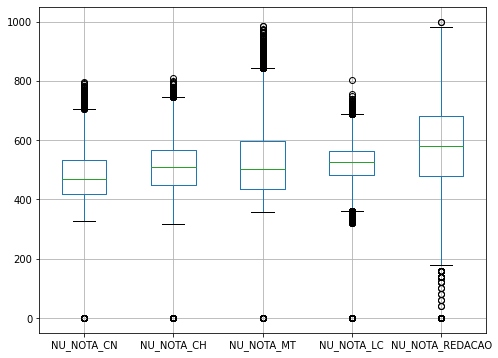

In [13]:
dados[provas].boxplot(grid=True, figsize= (8,6))
plt.title("Boxplot das notas de todas as áreas")

### Desafio 004

Comparar as distribuição das provas em ingles e espanhol

## Aula 02

In [ ]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

In [ ]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True) #dá a proporção

In [ ]:
alunos_ate_quartoze = dados.query("NU_IDADE <= 14")
alunos_ate_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(8,6))

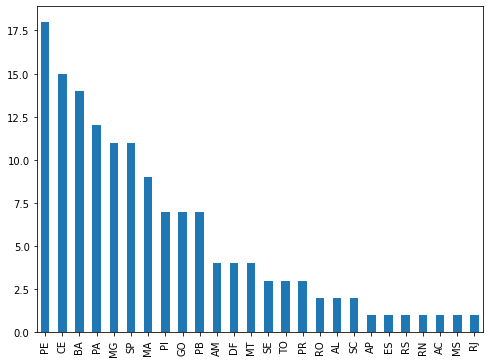

In [40]:
alunos_ate_quartoze["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(8,6))

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

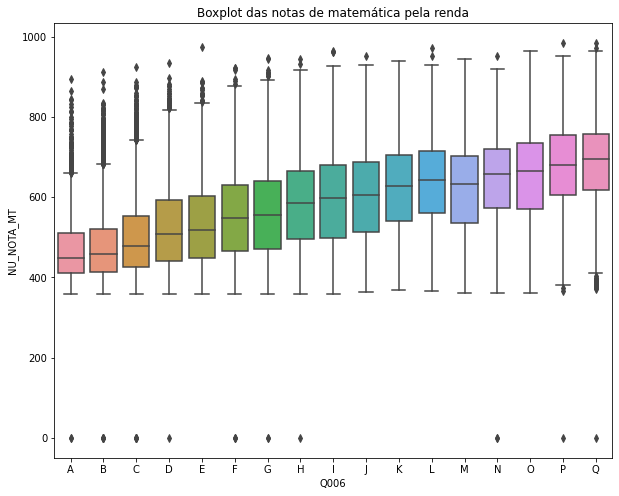

In [54]:
import seaborn as sns

renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

plt.figure(figsize=(10, 8))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")